In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid"])

In [402]:
__author__ = "Swagatam Haldar"
__copyright__ = "Copyright 2021, Project Swagatam"
__email__ = "swagatamkgp20@gmail.com"
__version__ = "0.0.0"
__maintainer__ = "Swagatam Haldar"
__status__ = "Development"

In [4]:
%config Completer.use_jedi = False

In [5]:
n = 2000 #runs, each run is a separate k-arm bandit problem
pulls = 1000 #in each run 1000 pulls
k = 10 #10-arm bandits

In [25]:
seed = 1234
np.random.seed(seed)

### 1. Create a class for the `bandit`, which contains a function pull that takes the action as the input and returns the reward.
The below Bandit class defines a k-arm bandit with **stationary** reward distribution function.

In [89]:
class Bandit(object):
    
    def __init__(self, k):
        self.k = k
    
    def initialize(self, mu=0, sigma=1):
        self.q_star = mu + sigma*np.random.randn(self.k) #mean rewards
        
    def pull(self, action):
        mean = self.q_star[action] # action is in {0,1,2,..,k-1}
        sigma = 1 # var = sigma**2
        return mean + sigma*np.random.randn()

### 2. Implement the $\epsilon$-greedy method on the 10-armed testbed described above, for three values: $0.1, 0.01$, and $0$. In two separate plots, plot (1) the averaged reward across the $n=2000$ runs as a function of the number of pulls for all three $\epsilon$s and (2) the total regret, averaged across the $n=2000$ runs, as a function of the number of pulls for all three $\epsilon$s. Explain what you expected to see and what you actually saw.

In [215]:
class BanditAlgo(object):
    
    def __init__(self, pulls=1000):
        self.pulls = pulls
    
    def run(self, bandit):
        # One run of bandit for num pulls
        # returns rewards Rt, %opt actions, regret_t
        pass
    
class EpsGreedy(BanditAlgo):
    
    def __init__(self, pulls=1000, eps=0.1):
        super().__init__(pulls=pulls)
        self.eps = eps
        
    def initialize_estimates(self, k):
        self.Q = np.zeros(k)
        self.N = np.zeros(k)
        
    def update_estimates(self, action, R):
        self.N[action] = self.N[action] + 1
        self.Q[action] = self.Q[action] + (R - self.Q[action])/self.N[action]
        
    def run(self, bandit):
        
        self.initialize_estimates(bandit.k)
        optimal_action = np.argmax(bandit.q_star)
        
        opts = 0 # till t, num. of optimal actions taken
        Rsum = 0 # sum of rewards till t i.e., R1+R2+...+Rt
        
        R = np.zeros(self.pulls)
        opt = np.zeros(self.pulls) # per. optimal action taken
        regret = np.zeros(self.pulls)
        for pull in range(self.pulls):
            # prob = 1 - self.eps # this was a bug!
            rand = np.random.rand()
            if rand >= self.eps:
                A = np.argmax(self.Q) # ties?
            else:
                A = np.random.choice(bandit.k)
            
            if A == optimal_action:
                opts += 1
            opt[pull] = opts/(pull+1)
            
            R[pull] = bandit.pull(A) # act and get reward
            
            Rsum += R[pull]
            regret[pull] = (pull+1)*bandit.q_star[optimal_action] - Rsum
            
            self.update_estimates(A, R[pull])
        
        # print(f"opts = {opts}, opt = {opt[-1]}")
        return R, opt, regret

In [199]:
# b = Bandit(10)
# b.initialize()

In [200]:
# b.q_star

array([-0.39011986, -0.71784621,  2.09079124,  0.07601013, -0.89905569,
        0.77499403,  1.18953789, -1.03617118,  0.06192003, -0.55398658])

In [201]:
# np.argmax(b.q_star)

2

In [203]:
# np.random.choice(k)

4

In [267]:
epsilons = [0.1, 0.01, 0]

# placeholders to store rewards, %opt. actions, regrets at each step/pull    
r = np.zeros((3, pulls))
o = np.zeros((3, pulls))
reg = np.zeros((3, pulls))
for run_id in range(n):
    b = Bandit(k)
    b.initialize()
    
    eps_greedy1 = EpsGreedy(eps=epsilons[0])
    eps_greedy2 = EpsGreedy(eps=epsilons[1])
    eps_greedy3 = EpsGreedy(eps=epsilons[2])
    
    R0, O0, reg0 = eps_greedy1.run(b)
    R1, O1, reg1 = eps_greedy2.run(b)
    R2, O2, reg2 = eps_greedy3.run(b)

    r[0, :] += R0
    r[1, :] += R1
    r[2, :] += R2
    
    o[0, :] += O0
    o[1, :] += O1
    o[2, :] += O2
    
    reg[0, :] += reg0
    reg[1, :] += reg1
    reg[2, :] += reg2
#     print("="*100)

r = r/n
o = o/n
reg = reg/n

In [268]:
eps_greedy1.pulls, n

(1000, 2000)

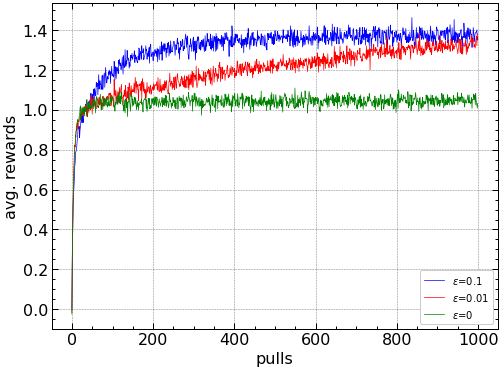

In [269]:
x = np.arange(eps_greedy1.pulls)
y1, y2, y3 = r[0, :], r[1, :], r[2, :]

plt.plot(x, y1, "-", color="blue", lw=0.7, ms=5, label = f"$\epsilon$={epsilons[0]}") 
plt.plot(x, y2, "-", color="red", lw=0.7, ms=5, label = f"$\epsilon$={epsilons[1]}") 
plt.plot(x, y3, "-", color="green", lw=0.7, ms=5, label = f"$\epsilon$={epsilons[2]}") # shows data
plt.ylabel('avg. rewards')
plt.xlabel('pulls')

plt.legend(loc = "lower right", fontsize = 10)

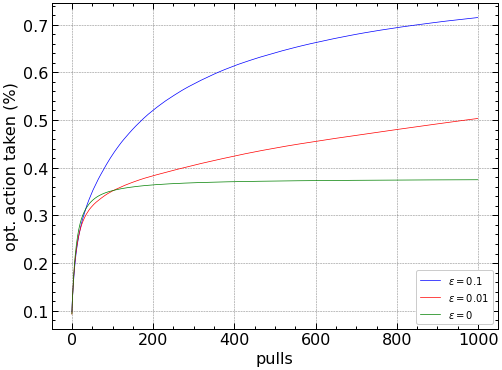

In [270]:
x = np.arange(eps_greedy1.pulls)
y1, y2, y3 = o[0, :], o[1, :], o[2, :]


plt.plot(x, y1, "-", color="blue", lw=0.7, ms=5, label = f"$\epsilon={epsilons[0]}$") 
plt.plot(x, y2, "-", color="red", lw=0.7, ms=5, label = f"$\epsilon={epsilons[1]}$") 
plt.plot(x, y3, "-", color="green", lw=0.7, ms=5, label = f"$\epsilon={epsilons[2]}$") # shows data
plt.ylabel('opt. action taken (%)')
plt.xlabel('pulls')

plt.legend(loc = "lower right", fontsize = 10)

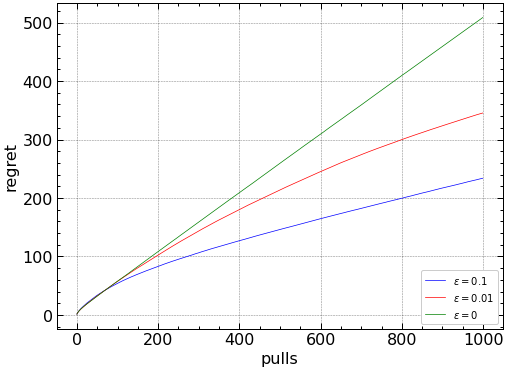

In [271]:
x = np.arange(eps_greedy1.pulls)
y1, y2, y3 = reg[0, :], reg[1, :], reg[2, :]


plt.plot(x, y1, "-", color="blue", lw=0.7, ms=5, label = f"$\epsilon={epsilons[0]}$") 
plt.plot(x, y2, "-", color="red", lw=0.7, ms=5, label = f"$\epsilon={epsilons[1]}$") 
plt.plot(x, y3, "-", color="green", lw=0.7, ms=5, label = f"$\epsilon={epsilons[2]}$") # shows data
plt.ylabel('regret')
plt.xlabel('pulls')

plt.legend(loc = "lower right", fontsize = 10)

### Note
The above figures are basically the figures from Barto & Sutton book reproduced!

### 3. Do you think setting $\epsilon$ = 0.9 is a good strategy? Give reasons why it is or it is not. Plot the average reward and total regret plots for $\epsilon$ = 0.9. Explain what you expected to see and what you actually saw.
Certainly it's not a good strategy as it makes the algorithm take the optimal action (according to argmax of Q estimates) only 10% of the times.

In [272]:
epsilon = 0.9

r = np.zeros(pulls)
o = np.zeros(pulls)
reg = np.zeros(pulls)

for run_id in range(n):
    b = Bandit(k)
    b.initialize()
    
    eps_greedy = EpsGreedy(eps=epsilon)
    rewards, optpers, regrets = eps_greedy.run(b)
    
    r += rewards
    o += optpers
    reg += regrets

r = r/n
o = o/n
reg = reg/n

In [273]:
x = np.arange(eps_greedy.pulls)
# o

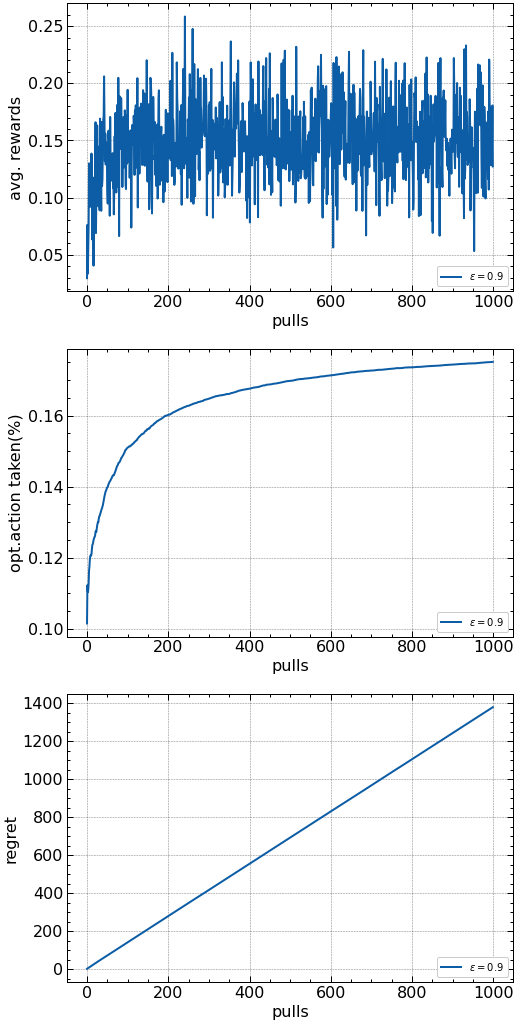

In [274]:
fig, axes = plt.subplots(3, 1, figsize = (8, 18))
ax = axes[0] # take the top left 1
ax.plot(x, r, "-", label = f"$\epsilon={epsilon}$") 
ax.set_xlabel("pulls")
ax.set_ylabel("avg. rewards")
ax.legend(loc = "lower right", fontsize = 10)


ax = axes[1]
ax.plot(x, o, "-", label = f"$\epsilon={epsilon}$") 
ax.set_ylabel("opt.action taken(%)")
ax.set_xlabel("pulls")
ax.legend(loc = "lower right", fontsize = 10)

ax = axes[2]
ax.plot(x, reg, "-", label = f"$\epsilon={epsilon}$") 
ax.set_xlabel("pulls")
ax.set_ylabel("regret")
ax.legend(loc = "lower right", fontsize = 10)



plt.show()

**Observation:** The total regret reaches $1400$ that is also equal to $1.4$ ($\approx$max. avg. reward per step, achieved for $\epsilon$=0.1) times no. of pulls i.e 1000. So basically, the regret term is dominated by $q_*(a^*)$ times no. of iterations, where $a^*$ is the optimal action and $q_*$ is the actual expected reward/value associated with the action.

For $\epsilon=0.9$, the optimal action is taken only with $10$% probability. Since most of the times we are choosing random actions, the sum of rewards is also random and tends to zero (as initially they were drawn from a zero mean normal distribution).

### 4. Implement the optimistic initial value method on the 10-armed testbed described above, for initial action-value estimates $Q_1$(a)=+3 for all a. Compare its performance, measured by the average reward across $n=2000$ runs as a function of the number of pulls, with the non-optimistic setting where $Q_1$(a)=0 for all a. For both optimistic and non-optimistic settings, $\epsilon$=0. Explain what you expected to see and what you actually saw.
### 5. What happens when you set the initial action-value estimates Q1(a) = +100 for all a? Plot the comparison of average reward for $Q_1$(a) = +0, $Q_1$(a) = +3, and $Q_1$(a) = +100. Explain what you expected to see and what you actually saw.

In [282]:
class OptimisticInitialValue(EpsGreedy):
    
    def __init__(self, pulls=1000, eps=0.0, value=3):
        self.pulls, self.eps = pulls, eps
        self.value = value
        
    def initialize_estimates(self, k):
        self.Q = np.zeros(k)
        self.N = np.zeros(k)
        
        self.Q = self.Q + self.value #optimistic init. same for all action estimates.

**NOTE**: Optimistic initial value method is basically the same algorithm as epsilon greedy, it's just that it starts with non-zero and optimistic intial values. `update` and `run` i.e., acting methods are same for both.

In [328]:
epsilon = 0 #for both optimistic & non-optimistic setting
opt_val = [3, 0.5, 100]

r_non = np.zeros(pulls)
r_opt = np.zeros((len(opt_val), pulls))

for run_id in range(n):
    b = Bandit(k)
    b.initialize()
    
    eps_greedy = EpsGreedy(eps=epsilon) #since eps=0, this is plain greedy!
    rewards, _, __ = eps_greedy.run(b)
    r_non += rewards
    
    for idx in range(len(opt_val)):
        optimistic_greedy = OptimisticInitialValue(eps=epsilon, value=opt_val[idx])
        rewards, _, __ = optimistic_greedy.run(b)
        r_opt[idx, :] += rewards

r_non = r_non/n
r_opt = r_opt/n

In [329]:
r_opt.shape

(3, 1000)

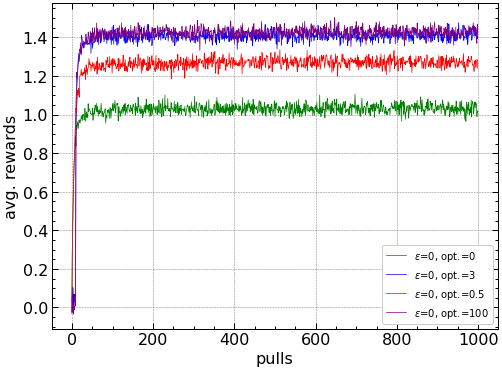

In [330]:
x = np.arange(eps_greedy1.pulls)
# plt.figure(figsize=(20, 4.5))
plt.plot(x, r_non, "-", color="green", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.=$0$") 

y1, y2, y3 = r_opt[0, :], r_opt[1, :], r_opt[2, :]

plt.plot(x, y1, "-", color="blue", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.={opt_val[0]}") 
plt.plot(x, y2, "-", color="red", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.={opt_val[1]}")
plt.plot(x, y3, "-", color="purple", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.={opt_val[2]}") 
plt.ylabel('avg. rewards')
plt.xlabel('pulls')

plt.legend(loc = "lower right", fontsize = 10)

**Observation:** Even though here $\epsilon$ = 0, we see that optimistic initialisation performs better than plain greedy one. This is because initially the optimistic method encourages some exploration, whereas in the zero initialisation, there is NO exploration to settle on the optimal action.
Interistingly when `opt_val` was greater than max reward value, it performed as good as the $\epsilon = 0.1$ algorithm.

So setting the initial value too high, doesn't seem to have considerable effect, but setting it close to actual reward value may limit the exploration prematurely.

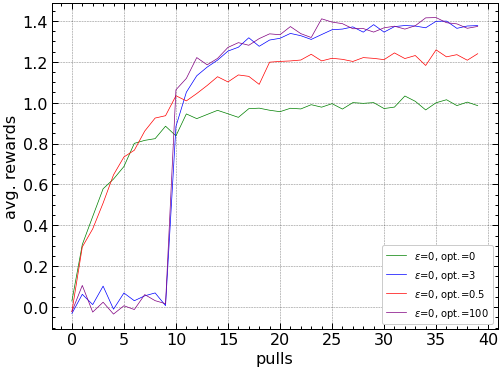

In [331]:
x = np.arange(eps_greedy1.pulls)
# plt.figure(figsize=(20, 4.5))
plt.plot(x[0:40], r_non[0:40], "-", color="green", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.=$0$") 

y1, y2, y3 = r_opt[0, :], r_opt[1, :], r_opt[2, :]

plt.plot(x[0:40], y1[0:40], "-", color="blue", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.={opt_val[0]}") 
plt.plot(x[0:40], y2[0:40], "-", color="red", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.={opt_val[1]}")
plt.plot(x[0:40], y3[0:40], "-", color="purple", lw=0.7, ms=5, label = f"$\epsilon$={epsilon}, opt.={opt_val[2]}") 
plt.ylabel('avg. rewards')
plt.xlabel('pulls')

plt.legend(loc = "lower right", fontsize = 10)

### 6. Implement the UCB algorithm on the 10-armed testbed described above, for three values of the parameters c: 0.2, 1, and 5. In a single plot, compare their performances as measured by the average reward across n=2000 runs as a function of the number of pulls. Explain what you expected to see and what you actually saw.

In [338]:
class UCB(BanditAlgo):
    
    def __init__(self, pulls=1000, c=0.2):
        super().__init__(pulls=pulls)
        self.c = c
        
    def initialize_estimates(self, k):
        self.Q = np.zeros(k)
        self.N = np.zeros(k)
        
    def update_estimates(self, action, R):
        self.N[action] = self.N[action] + 1
        self.Q[action] = self.Q[action] + (R - self.Q[action])/self.N[action]
        
    def run(self, bandit):
        
        self.initialize_estimates(bandit.k)
        optimal_action = np.argmax(bandit.q_star)
        
        opts = 0 # till t, num. of optimal actions taken
        Rsum = 0 # sum of rewards till t i.e., R1+R2+...+Rt
        
        R = np.zeros(self.pulls)
        opt = np.zeros(self.pulls) # per. optimal action taken
        regret = np.zeros(self.pulls)
        
        # Note: Change in variable name: "pull" -> "t"
        for t in range(self.pulls):
            
            Q_plus_term = self.Q + self.c * np.sqrt(np.log(t)/(self.N + 1e-5))
            At = np.argmax(Q_plus_term) # note that there is no epsilon here!
            
            if At == optimal_action:
                opts += 1
            opt[t] = opts/(t+1)
            
            R[t] = bandit.pull(At)
            Rsum += R[t]
            regret[t] = (t+1)*bandit.q_star[optimal_action] - Rsum
            
            self.update_estimates(At, R[t])
            
        return R, opt, regret

In [339]:
c_vals = [0.2, 1, 5]

# placeholders to store rewards, %opt. actions, regrets at each step/pull
r = np.zeros((len(c_vals), pulls))
o = np.zeros((len(c_vals), pulls))
reg = np.zeros((len(c_vals), pulls))

for run_id in range(n):
    
    b = Bandit(k)
    b.initialize()
    
    for idx in range(len(c_vals)):
        ucb_algo = UCB(c=c_vals[idx])
        rewards, opt_pers, regrets = ucb_algo.run(b)
        r[idx, :] += rewards
        o[idx, :] += opt_pers
        reg[idx, :] += regrets
        
        
r = r/n
o = o/n
reg = reg/n

<ipython-input-338-c64c0281fa7f>:30: RuntimeWarning: divide by zero encountered in log
  Q_plus_term = self.Q + self.c * np.sqrt(np.log(t)/(self.N + 1e-5))
<ipython-input-338-c64c0281fa7f>:30: RuntimeWarning: invalid value encountered in sqrt
  Q_plus_term = self.Q + self.c * np.sqrt(np.log(t)/(self.N + 1e-5))


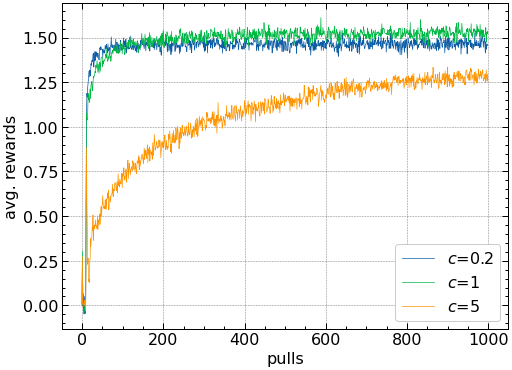

In [351]:
x = np.arange(ucb_algo.pulls)

for idx in range(len(c_vals)):
    yi = r[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = f"$c$={c_vals[idx]}")

plt.ylabel('avg. rewards')
plt.xlabel('pulls')

plt.legend(loc = "lower right")#, fontsize = 10)
plt.show()

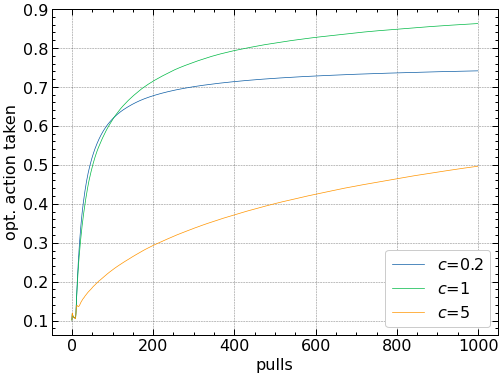

In [350]:
x = np.arange(ucb_algo.pulls)

for idx in range(len(c_vals)):
    yi = o[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = f"$c$={c_vals[idx]}")

plt.ylabel('opt. action taken')
plt.xlabel('pulls')

plt.legend(loc = "lower right")#, fontsize = 10)
plt.show()

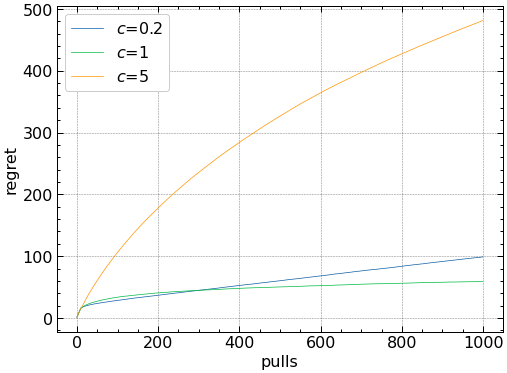

In [349]:
x = np.arange(ucb_algo.pulls)

for idx in range(len(c_vals)):
    yi = reg[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = f"$c$={c_vals[idx]}")

plt.ylabel('regret')
plt.xlabel('pulls')

plt.legend(loc = "upper left")#, fontsize = 10)
plt.show()

**Observation:** Looks like $c = 1$ produces the best results and it even beats the best of $\epsilon$-greedy algorithms. Note that there is no randomized decision made to choose actions in UCB unlike $\epsilon$-greedy. The degree of exploration is controlled by $c$ and I think too high a $c$ slows down the convergence and too low $c$ settles down early without exploring much.

### 7. For this question, we will modify the 10-armed bandit setup. We will follow the same setup except that the action values, $q_{star}(a)$, $a$=1,...,10, are selected according to a normal (Gaussian) distribution with mean $+4$ and variance 1. Rest of the setup is same. Implement the `Gradient bandit method` on this modified 10-armed testbed, for 4 settings: (1) reward baseline is the average reward, α=0.1, (2) reward baseline is the average reward, α=0.5, (3) no reward baseline, $\alpha$=0.1, (4) no reward baseline, α=0.5. In a single plot, compare their performances as measured by the average reward across $n=2000$ runs as a function of the number of pulls. Explain what you expected to see and what you actually saw.

In [352]:
def softmax(x):
    """Compute softmax values for each sets of scores in a 1D array x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [356]:
softmax(np.zeros(k))

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [365]:
np.random.choice(3, 10, p=[0.2, 0.4, 0.4])

array([1, 2, 0, 2, 1, 1, 2, 2, 1, 2])

In [380]:
class GradientBandit(BanditAlgo):
    
    def __init__(self, pulls=1000, alpha=0.1, use_baseline=True):
        super().__init__(pulls=pulls)
        self.alpha = alpha
        self.use_baseline = use_baseline
        
    def initialize_estimates(self, k):
        self.H = np.zeros(k)
        self.pi = softmax(self.H)
        
    def update_estimates(self, At, Rt, Rt_bar):
        
        onehot = np.zeros(len(self.H))
        onehot[At] = 1
        self.H = self.H + self.alpha * (Rt - Rt_bar) * (onehot - self.pi[At])
        
        """ Loopy version!
        self.H[At] = self.H[At] + self.alpha * (Rt - Rt_bar) * (1 - pi[At])
        for a in range(len(self.H)):
            if a != At:
                self.H[At] = self.H[At] - self.alpha * (Rt - Rt_bar) * pi[At]
        """        
        self.pi = softmax(self.H)
    
    def run(self, bandit):
        
        self.initialize_estimates(bandit.k)
        optimal_action = np.argmax(bandit.q_star)
        
        opts = 0 # till t, num. of optimal actions taken
        Rsum = 0 # sum of rewards till t i.e., R1+R2+...+Rt
        
        R = np.zeros(self.pulls)
        opt = np.zeros(self.pulls) # per. optimal action taken
        regret = np.zeros(self.pulls)
        
        for t in range(self.pulls):
            
            At = np.random.choice(k, p=self.pi) #act
            if At == optimal_action:
                opts += 1
            opt[t] = opts/(t+1)
            
            R[t] = bandit.pull(At)
            Rsum += R[t]
            regret[t] = (t+1)*bandit.q_star[optimal_action] - Rsum
            
            if self.use_baseline:
                self.update_estimates(At, R[t], Rsum/(t+1))
            else:
                self.update_estimates(At, R[t], 0.0)
            
        return R, opt, regret

In [381]:
alphas = [0.1, 0.5]
# baseline = True


# placeholders to store rewards, %opt. actions, regrets at each step/pull
r = np.zeros((len(alphas), pulls))
o = np.zeros((len(alphas), pulls))
reg = np.zeros((len(alphas), pulls))

# placeholders for with baseline = False
r_ = np.zeros((len(alphas), pulls))
o_ = np.zeros((len(alphas), pulls))
reg_ = np.zeros((len(alphas), pulls))

for run_id in range(n):
    
    b = Bandit(k)
    b.initialize(mu=4)
    
    for idx in range(len(alphas)):
        gb_algo = GradientBandit(alpha=alphas[idx], use_baseline=True)
        rewards, opt_pers, regrets = gb_algo.run(b)
        r[idx, :] += rewards
        o[idx, :] += opt_pers
        reg[idx, :] += regrets
        
    for idx in range(len(alphas)):
        gb_algo = GradientBandit(alpha=alphas[idx], use_baseline=False)
        rewards, opt_pers, regrets = gb_algo.run(b)
        r_[idx, :] += rewards
        o_[idx, :] += opt_pers
        reg_[idx, :] += regrets
#     print(run_id)
        
        
r = r/n
o = o/n
reg = reg/n

r_ = r_/n
o_ = o_/n
reg_ = reg_/n

the above loop took 4-5 minutes!

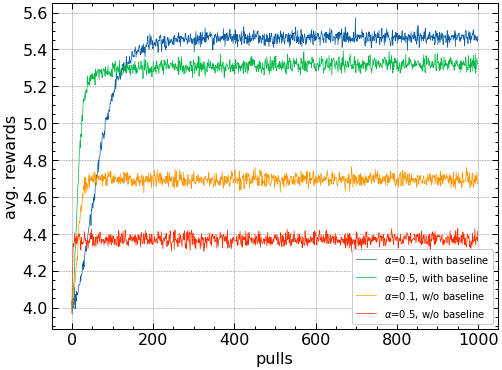

In [394]:
x = np.arange(gb_algo.pulls)
for idx in range(len(alphas)):
    yi = r[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = fr"$\alpha$={alphas[idx]}, with baseline")

for idx in range(len(alphas)):
    yi = r_[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = fr"$\alpha$={alphas[idx]}, w/o baseline")

plt.ylabel('avg. rewards')
plt.xlabel('pulls')

plt.legend(loc = "lower right", fontsize = 10)
plt.show()

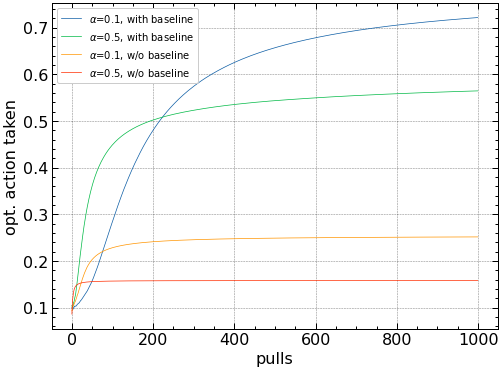

In [399]:
x = np.arange(gb_algo.pulls)
for idx in range(len(alphas)):
    yi = o[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = fr"$\alpha$={alphas[idx]}, with baseline")

for idx in range(len(alphas)):
    yi = o_[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = fr"$\alpha$={alphas[idx]}, w/o baseline")

plt.ylabel('opt. action taken')
plt.xlabel('pulls')

plt.legend(loc = "upper left", fontsize = 10)
plt.show()

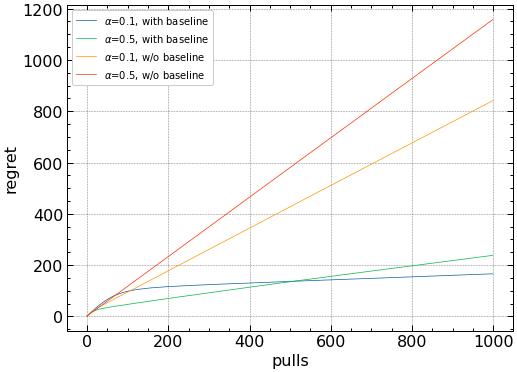

In [400]:
x = np.arange(gb_algo.pulls)
for idx in range(len(alphas)):
    yi = reg[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = fr"$\alpha$={alphas[idx]}, with baseline")

for idx in range(len(alphas)):
    yi = reg_[idx, :]
    plt.plot(x, yi, "-", lw=0.7, ms=5, label = fr"$\alpha$={alphas[idx]}, w/o baseline")

plt.ylabel('regret')
plt.xlabel('pulls')

plt.legend(loc = "upper left", fontsize = 10)
plt.show()

**Observations:** With reward average as the baseline of course works better here. Another interesting thing is $\alpha=0.5$ settles faster without much exploration a slower step size converges to a better optimum.

### 8. How would you compare the performance of all the 4 different methods: $\epsilon$-greedy, optimistic initial value, UCB, and gradient bandits? How would you rank them in terms of regret?

Can the algorithm handle non-stationary distributions?
 - $\epsilon$-greedy can, but with constant step size. Since here the problem was stationary, the step size of $1/n$ worked.
 - Optimistic initial value and UCB cannot since their exploration tendencies terminate eventually.
 - I think Gradient Bandit can handle non-stationary problems as it is based on gradients wrt the preferences and it can update them eventually.
 
How long do the algorithms keep exploring before settling on (greedy) actions?
 - $\epsilon$-greedy never stops exploring as there is always a probability to select non-optimal actions.
 - Optimistic initial value method depends on how close the initial values are to the actual reward values. If init is greater than the max, then it keeps exploring until the estimated rewards are brought back into range.
 - UCB method's extent of exploration depends on $c$.
 - Gradient Bandit algorithm explores depending on $\alpha$ or the step size. If it is higher, it settles down sooner to give higher preferences to whichever action proved to be the most rewarding in the earlier stages.

Does there exist any randomness while taking the action inside the algorithm?

How easy it is to extend the algorithm to more general RL setups?

Is there any convergence issue?